<div class='alert alert-info'>
    <h1>Data Wrangling - La cirugia de datos</h1>
    <p>El <b>data wrangling</b> a veces denominado <b>data munging</b>, es el proceso de transformar y mapear datos de un dataset en otro formato con la intención de hacerlo más apropiado para una variedad de propósitos posteriores, como el análisis.  Un data wrangler es una persona que realiza estas operaciones.</p>
    <p>Esto puede incluir visualización de datos, agregación de datos, entrenamiento de un modelo, así como muchos otros usus potenciales. La oscilación de datos como proceso generalmente sigue un conjunto de pasos generales que conmienzan extrayendo los datos en forma cruda del origen de datos, dividiendo los datos usando algoritomos como un clasificador, o analizando datos en estructuras de datos predefinidas.</p>
</div>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


<div class='alert alert-success'>
    <h3>Crear subconjunto de datos</h3>          
</div>

In [3]:
account_lenght = data['Account Length']
subset = data[['Account Length', 'Phone', 'Eve Charge', 'Day Calls']]
subset.head()

,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113


In [4]:
# Obteniendo conjunto complementario.  Columnas no deseadas.

all_columns = data.columns.values.tolist()
desire_columns = ['Account Length', 'Phone', 'Eve Charge', 'Day Calls']

unwished_columns = [x for x in all_columns if x not in desire_columns]
unwished_columns

['State',
 'Area Code',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [5]:
data[unwished_columns].head()

,State,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Charge,Eve Mins,Eve Calls,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,no,yes,25,265.1,45.07,197.4,99,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,no,yes,26,161.6,27.47,195.5,103,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,no,no,0,243.4,41.38,121.2,110,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,yes,no,0,299.4,50.90,61.9,88,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,yes,no,0,166.7,28.34,148.3,122,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
# obtener las primeras 9 filas

data[0:9]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.


In [7]:
# Usuarios con Day Mins > 200

data1 = data[data['Day Mins'] > 200]
data1.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.


In [8]:
# Minutos de dia, de noche y longitud de la cuenta de los primeros 10

first_10 = data[['Day Mins', 'Night Mins', 'Account Length']][0:10]
first_10

,Day Mins,Night Mins,Account Length
0,265.1,244.7,128
1,161.6,254.4,107
2,243.4,162.6,137
3,299.4,196.9,84
4,166.7,186.9,75
5,223.4,203.9,118
6,218.2,212.6,121
7,157.0,211.8,147
8,184.5,215.8,117
9,258.6,326.4,141


In [9]:
data.iloc[0:10, 3:6] # Por indices

,Phone,Int'l Plan,VMail Plan
0,382-4657,no,yes
1,371-7191,no,yes
2,358-1921,no,no
3,375-9999,yes,no
4,330-6626,yes,no
5,391-8027,yes,no
6,355-9993,no,yes
7,329-9001,yes,no
8,335-4719,no,no
9,330-8173,yes,yes


In [10]:
data.loc[0:10, ['Day Mins', 'Night Mins', 'Account Length']]  # Por etiquetas

,Day Mins,Night Mins,Account Length
0,265.1,244.7,128
1,161.6,254.4,107
2,243.4,162.6,137
3,299.4,196.9,84
4,166.7,186.9,75
5,223.4,203.9,118
6,218.2,212.6,121
7,157.0,211.8,147
8,184.5,215.8,117
9,258.6,326.4,141


In [11]:
data['Total Mins'] = data['Day Mins'] + data['Night Mins'] + data['Eve Mins']
data['Total Mins'].head()

0    707.2
1    611.5
2    527.2
3    558.2
4    501.9
Name: Total Mins, dtype: float64

<div class='alert alert-success'>
    <h3>Números aleatorios</h3>          
</div>

In [12]:
import numpy as np
import random

In [13]:
np.random.randint(1,100)

15

In [14]:
lista = [np.random.randint(1,100) for i in range(10)]
lista

[13, 31, 53, 88, 23, 45, 65, 19, 13, 7]

In [15]:
random.randrange(0, 100, 3) # (desde, hasta, multiplos de...)

42

In [16]:
lista2 = [random.randrange(0, 100, 3) for i in range(10)]
lista2

[84, 21, 6, 75, 30, 39, 96, 30, 99, 81]

In [17]:
# Shuffling  (Mezclado de elementos)

lista3 = np.arange(100)
np.random.shuffle(lista3)
print(lista3)

[87 30 31 49 55 29 42 97 98 33 94 86 80 23 92 44 56 14 71  2 59 43 63 70
 83  4 20  0 74 24 73 40 22 32  6 72 60 81 26 88 85 90 37 45 93 58 54 36
 67 53 19 89 46 17 50 69 16  7 68 34 62 82 52 13 84  5 28 48 75 25 18 57
  8 38 91 65 96  9 64 47 39 76 35 99 41 95 51 10 15  3 78  1 61 11 66 12
 21 79 77 27]


In [18]:
# elegir una de las columnas al azar

columns = data.columns.values.tolist()

np.random.choice(columns)

"Int'l Plan"

In [19]:
# Seed

np.random.seed(26)
for i in range(5):
    print(np.random.random())

0.30793495262497084
0.5193914793053007
0.7682976615379734
0.7892207361708597
0.8705620624758235


In [20]:
import matplotlib.pyplot as plt

<div class='alert alert-info'>
    <h2>Funciones de distribución</h2>          
</div>

### Distribución uniforme

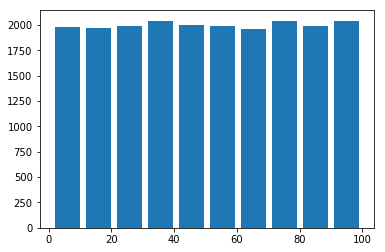

In [39]:
a = 1      # límite inferior
b = 100    # límite superio
n = 20000    # número de muestras

dis_uniform = np.random.uniform(a, b, n)

plt.hist(dis_uniform, rwidth=0.8)
plt.show()

### Distribución normal

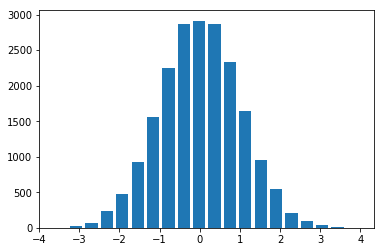

In [41]:
dis_normal = np.random.randn(n)

plt.hist(dis_normal, rwidth=0.8, bins=20)
plt.show()

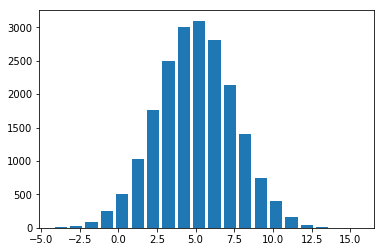

In [42]:
#  Una no Gaussinan
mu = 5    # media
sd = 2.5  # desviación estandar

dis = mu + sd*np.random.randn(n)

plt.hist(dis, rwidth=0.8, bins=20)
plt.show()